In [2]:
# importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

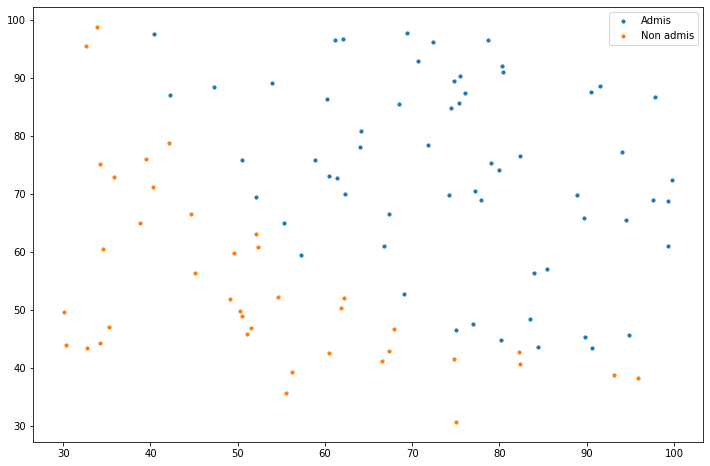

In [3]:

# load the data from the file
data = pd.read_csv("marks.txt")

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admis = data.loc[y == 1]

# filter out the applicants that din't get admission
non_admis = data.loc[y == 0]

# plots
plt.figure(figsize=(12,8))
plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=10, label='Admis')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=10, label='Non admis')
plt.legend()
plt.show()

In [4]:
X.shape

(99, 2)

In [5]:
y.shape

(99,)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
model.score(X,y)


0.8888888888888888

In [7]:
model.intercept_

array([-24.76261953])

In [8]:
model.coef_

array([[0.20251777, 0.19901181]])

In [9]:
predicted_classes

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [10]:
model.predict_proba([[90,40]])

array([[0.19396452, 0.80603548]])

In [11]:
model.predict([[90,40]])

array([1])

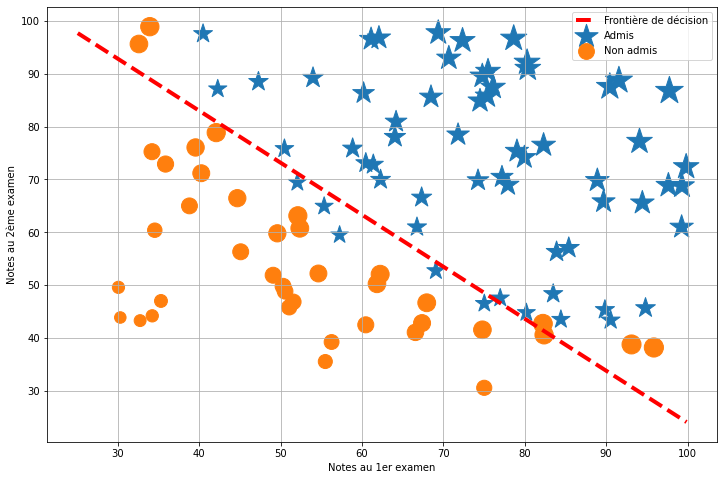

In [12]:
x_values = [np.min(X.iloc[:, 0] - 5), np.max(X.iloc[:, 1] + 1)]
y_values = -(model.intercept_ + np.dot(model.coef_[0,1], x_values))/model.coef_[0,0]

plt.figure(figsize=(12,8))
plt.scatter(admis.iloc[:, 0], admis.iloc[:, 1], s=admis.iloc[:, 0]*admis.iloc[:, 1]/10, label='Admis',marker='*')
plt.scatter(non_admis.iloc[:, 0], non_admis.iloc[:, 1], s=non_admis.iloc[:, 0]*non_admis.iloc[:, 1]/10, label='Non admis')
plt.plot(x_values, y_values, c='red',label='Frontière de décision',ls='--',linewidth=4)
plt.xlabel('Notes au 1er examen')
plt.ylabel('Notes au 2ème examen')
plt.grid(True)
plt.legend()
plt.show()